# Exemplo regressão linear simples com dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
data = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [30]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3.418946836103816
[-0.0618848]
O modelo é: y = 3.419 + (-0.062)x


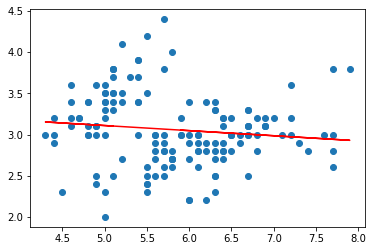

In [31]:
data = data.to_numpy()
y = data[:,1]
x = data[:,0]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))

## Exemplo regressão multipla com dataset

In [32]:
y = data[:,3]
x = data[:,0:2]
#X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [33]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)


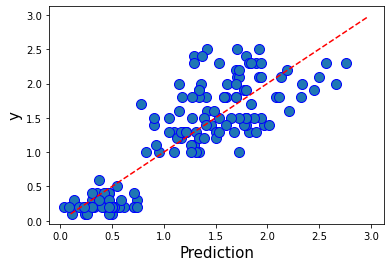

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)



In [35]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)


R2: 0.7429280023779847


## Exemplo com OLS estimação

In [36]:
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
# não usar numpy array

In [37]:
data = pd.read_csv('iris.csv', header=(0))
data.head(25)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [38]:
X = data[['sepal.length', 'sepal.length','petal.length']]
y = data[['petal.width']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal.width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.60e-85
Time:                        08:30:59   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049      0.961      -0.369       0.351
sepal.length    -0.0411      0.021     -1.992      0.048      -0.082      -0.000
sepal.length    -0.0411      0.021     -1.992      0.048      -0.082      -0.000
petal.length     0.4494      0.019     23.205      0.000       0.411       0.488
==============================================================================
Omnibus:                        6.657   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.663
Skew:                           0.386   Prob(JB):                       0.0357
Kurtosis:                       3.685   Cond. No.                     7.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Escolhendo os atributos para o x

In [39]:
data1 = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [40]:
data1 = data1.drop(columns=['sepal.width'])
data1.head()

,sepal.length,petal.length,petal.width,variety
0,5.1,1.4,0.2,Setosa
1,4.9,1.4,0.2,Setosa
2,4.7,1.3,0.2,Setosa
3,4.6,1.5,0.2,Setosa
4,5.0,1.4,0.2,Setosa


In [41]:
#data1 = data1.to_numpy()
y = data1.iloc[:,2]
x = data1.iloc[:,0:1]
X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [42]:
# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)

In [43]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.6690276860464137


In [44]:
data1 = pd.read_csv('mtcars.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [45]:
data1 = data1.to_numpy()
y = data1[:,4]
x = data1[:,1:3]
#x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [46]:
# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)

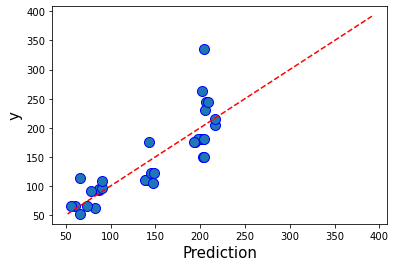

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)



In [48]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.7092593162528988


# Escolhendo x com dataset mtcars

In [66]:
data1 = pd.read_csv('mtcars.csv', header=(0))
print("Número de linhas e colunas:",data1.shape)
data1.head(25)

Número de linhas e colunas: (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [55]:
X = data1[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear']]
y = data1[['carb']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   carb   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     14.55
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.60e-07
Time:                        08:40:01   Log-Likelihood:                -27.109
No. Observations:                  32   AIC:                             76.22
Df Residuals:                      21   BIC:                             92.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4681      4.943     -0.499      0.623     -12.747       7.811
mpg           -0.0138      0.057     -0.241      0.812      -0.133       0.105
cyl            0.2854      0.268      1.066      0.299      -0.271       0.842
disp          -0.0143      0.004     -3.987      0.001      -0.022      -0.007
hp             0.0135      0.005      2.667      0.014       0.003       0.024
drat           0.4170      0.423      0.986      0.335      -0.462       1.296
wt             1.5332      0.426      3.597      0.002       0.647       2.420
qsec          -0.2249      0.192     -1.174      0.254      -0.624       0.174
vs            -0.2304      0.551     -0.418      0.680      -1.377       0.916
am            -0.1188      0.559     -0.212      0.834      -1.282       1.044
gear           0.7715      0.357      2.163      0.042       0.030       1.513
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.482
Skew:                          -0.146   Prob(JB):                        0.786
Kurtosis:                       2.474   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Coeficiente de correlação linear de um dataset

<AxesSubplot:>

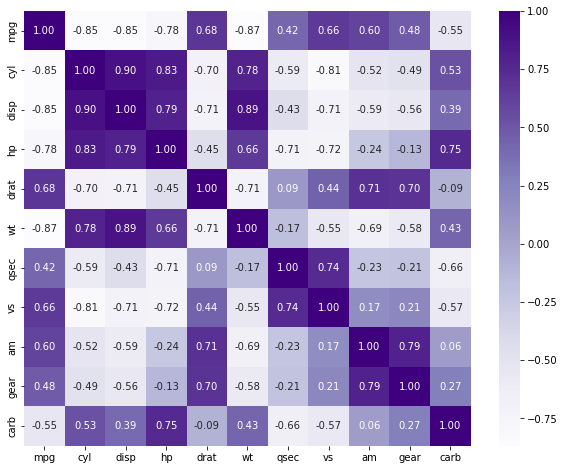

In [75]:
import seaborn as sns
corr = data1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')

# Exercício: Ler o dataset gapminder_2015. Exibir a tabela com os coeficientes de correlção linear completa. Fazer uma regressão linear com y sendo CPI e x sendo LifeExpect e calcular R2. Fazer outra regressão linear com y sendo CPI e x sendo Happyldx e calcular o R2. Fazer uma regressão múltipla com y sendo a CPI e x sendo LifeExpect e Happyldx e calcular o R2
    

In [ ]:
# resolução do exercício